# Predicting Diabetes

## Import Libraries

In [1]:
import pandas as pd # dataframe
import matplotlib.pyplot as plt # plots
import numpy as np # N-dim object support

# do ploting inline instead od in a separate window
%matplotlib inline 

## Load and review data

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


### Check for null values

In [5]:
df.isnull().values.any()

False

In [6]:
def plot_corr(df, size=11):
    """ 
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
       
    Input:
        df: pandas DataFrame
         size: vertical and horizontal size of the plot
            
    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """   
    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

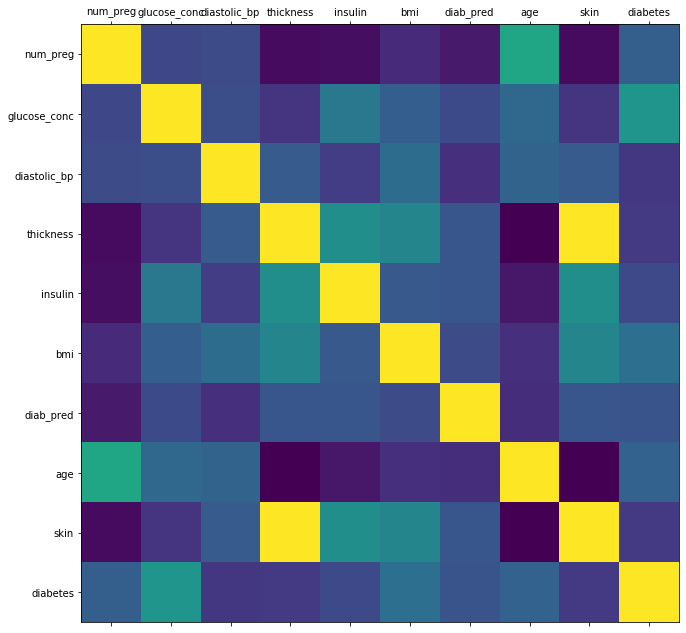

In [7]:
plot_corr(df)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del df['skin']

In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


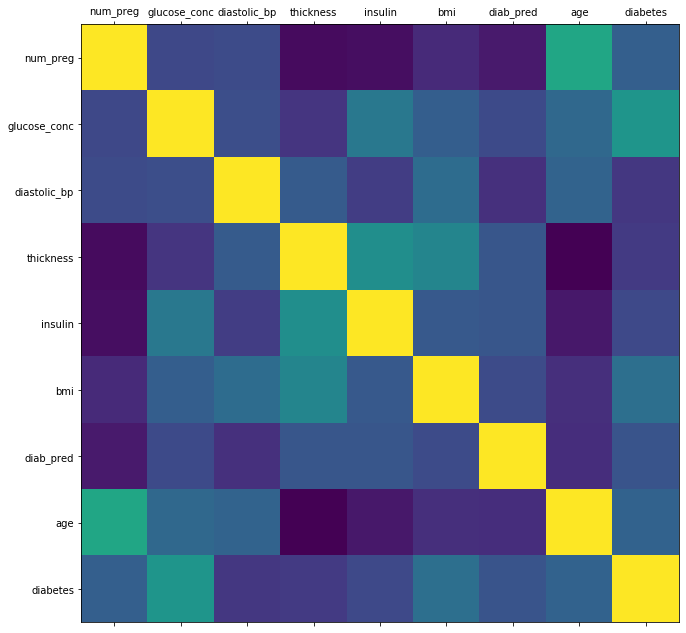

In [11]:
plot_corr(df)

### Check Data Types

Change True to 1, False to 0

In [12]:
diabetes_map = {True: 1, False: 0}

df['diabetes'] = df['diabetes'].map(diabetes_map)

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check true/false ratio

In [14]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


### Spliting the data

70% for training, 30% for testing

In [15]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values     # predictior feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X n)

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) # returns four np.arrays
                                    # test_size = 0.3 is 30%, 42 (seed - random state) is the answer to everything

We check to ensure we have the the desired 70% train, 30% test split of the data

In [16]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verifying predicted value was split correctly

In [17]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print()

print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print()

print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


## Post-split Data Preparation

Are 0 values possible?
How many rows have unexpected 0 values?

In [18]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


### Impute missing values with the mean

In [19]:
from sklearn.impute import SimpleImputer

# impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Agorithm - Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

# create model trained with training data
nb_model.fit(X_train, y_train.ravel())   # ravel flattens array to 1-dim array

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance on Training Data

In [21]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# accuracy
print("Accuracy train data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy train data: 0.7542


### Performance on Testing Data

In [22]:
nb_predict_test = nb_model.predict(X_test)

print("Accuracy test data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy test data: 0.7359


#### Metrics

In [23]:
print("Confusion Matrix") # provides the matrix which compares the predicted
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest Algorithm

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Performance on Training Data

In [25]:
rf_predict_train = rf_model.predict(X_train)

print("Accuracy train data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy train data: 1.0000


### Performance on Testing Data

In [26]:
rf_predict_test = rf_model.predict(X_test)

print("Accuracy test data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy test data: 0.7403


#### Metrics

In [27]:
print("Confusion Matrix") # provides the matrix which compares the predicted
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Logistic Regression Algorithm

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C = 0.7, random_state = 42, solver = 'liblinear')

lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Performance on Testing Data

In [29]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy test data: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Accuracy test data: 0.7446


#### Metrics

In [30]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



#### Setting regularization parameter

Max recall value of 0.613 occured at C = 1.4


Text(0, 0.5, 'Recall Score')

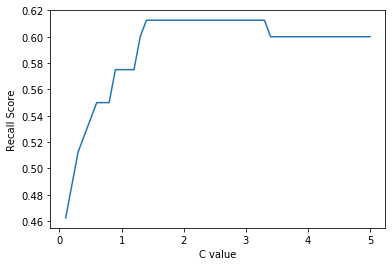

In [31]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    
    lr_model_loop = LogisticRegression(C = C_val, random_state = 42, solver = 'liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("Max recall value of {0:.3f} occured at C = {1:.1f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall Score")


### Logistic Regression Algorithm with class_weight='balanced'

Max recall value of 0.738 occured at C = 0.3


Text(0, 0.5, 'Recall Score')

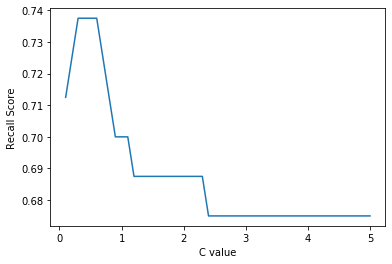

In [32]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    
    lr_model_loop = LogisticRegression(C = C_val, class_weight = 'balanced', random_state = 42, solver = 'liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    
    C_val += C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("Max recall value of {0:.3f} occured at C = {1:.1f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall Score")

#### Performance and Metrics

In [33]:
lr_model = LogisticRegression(C = best_score_C_val, class_weight = 'balanced', random_state = 42, solver = 'liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy test data: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print()

print("Confusion Matrix") # provides the matrix which compares the predicted
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print()

print("Recall score: {0:.4f}".format(metrics.recall_score(y_test, lr_predict_test)))

Accuracy test data: 0.7143

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231


Recall score: 0.7375


### The ROC Curve and the AUC

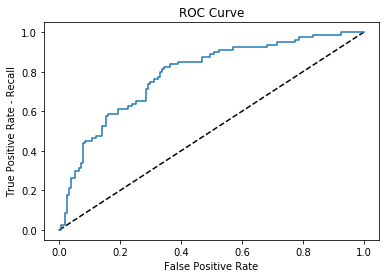

The AUC score: 0.7863


In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_model_roc = LogisticRegression(C = best_score_C_val, class_weight = 'balanced', random_state = 42, solver = 'liblinear')
lr_model_roc.fit(X_train, y_train.ravel())

lr_predict_prob_test = lr_model_roc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, lr_predict_prob_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate - Recall')
plt.title('ROC Curve')
plt.show()

print("The AUC score: {0:.4f}".format(roc_auc_score(y_test, lr_predict_prob_test)))

## Logistic Regression CV Algorithm

In [90]:
from sklearn.linear_model import LogisticRegressionCV

# nj_jobs=-1 -> using all cores on our system
# cv -> number of folds
# Cs -> number of values the algorithm will try while trying to find the best value for regularization parameter for each fold
lr_cv_model = LogisticRegressionCV(class_weight='balanced', Cs=8, cv=10, n_jobs=-1, random_state=42, refit=False, solver='liblinear')

lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=8, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

### Performance on Testing data

In [91]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy test data: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print()

print("Confusion Matrix") # provides the matrix which compares the predicted
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print()

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy test data: 0.7100

Confusion Matrix
[[109  42]
 [ 25  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231



### Cross Validation Score

In [77]:
from sklearn.model_selection import cross_val_score

lr_cv_score = cross_val_score(lr_cv_model, X, y.ravel(), cv = 5, scoring='roc_auc')

print("Cross Validation Scores: {}".format(lr_cv_score))

Cross Validation Scores: [0.80907407 0.80925926 0.81759259 0.86754717 0.84566038]


### GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1, 10)}

lr_cv_grid = GridSearchCV(lr_model, param_grid, cv=5)

lr_cv_grid.fit(X, y.ravel())

lr_cv_grid.best_params_

{'C': 1}